# 基于搜狗实验室的中文语料的词向量构建

## 下载搜狗实验室的中文语料

网址为：

http://www.sogou.com/labs/resource/cs.php
    
    
数据格式

`<doc><url>页面URL</url><docno>页面ID</docno><contenttitle>页面标题</contenttitle><content>页面内容</content></doc>`

注意：`content`字段去除了`HTML`标签，保存的是新闻正文文本

## 数据预处理

下载得到的数据是`.tar.gz`格式的压缩包，需要处理成`txt`文件送入到word2vec函数中

1. 在数据所在文夹打开终端，输入如下指令

`tar -zxvf news_sohusite_xml.full.tar.gz`

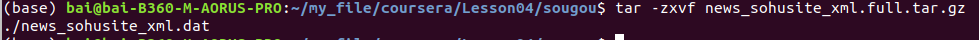

2. 在终端输入如下指令

`cat news_sohusite_xml.dat | iconv -f gbk -t utf-8 -c | grep "<content>"  > sougou.txt`

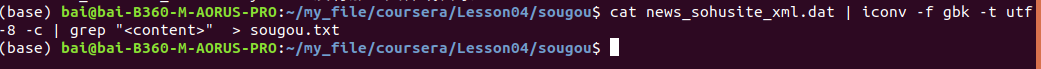
这样就将news_sohusite_xml.dat语料转换为sougou.txt文本形式。

3. 分词

In [3]:
import jieba
filePath = './data/sougou.txt' #语料路径
fileSeqWordDonePath = './data/sougou.seg.txt'# 分词后生成路径
 
fileTrainRead = []
with open(filePath, 'r', encoding='utf-8') as fileTrainRaw:
    for line in fileTrainRaw:
        fileTrainRead.append(line)
print(len(fileTrainRead))


#在python里，大数据处理一定要减少字典使用,字典主要是用来统计用，不用来计算。 建议考虑numpy.array做
def PrintListChinese(list):
    for i in range(len(list)):
        print (list[i])
        
#jieba分词
fileTrainSeg=[]
for i in range(len(fileTrainRead)):
    # 使用结巴分词的时候并不是从0到结尾的全部都进行分词，而是对[9:-11]分词，
    # 因为sougouCS原始数据集中有起始的<content> 和结尾的</content>，将其去掉
    fileTrainSeg.append([' '.join(list(jieba.cut(fileTrainRead[i][9:-11], cut_all=False)))])
    if i % 100 == 0 :
        print (i)
 
with open(fileSeqWordDonePath, 'w') as fw: #'w'参数必须得写，不写的话，默认的是只读方式（即‘r’）
    for i in range(len(fileTrainSeg)):
        # fw.write()只能输出str字符串，'str' object has no attribute 'encoding'
        #fw.write(fileTrainSeg[i][0].encoding('utf-8'))
        #  'str' object has no attribute 'decode',python3里str默认为unicode,只能编码encode ,不能解码 decode
        #fw.write(fileTrainSeg[i][0].dedcode('utf-8'))
 
        fw.write(fileTrainSeg[i][0])
        fw.write('\n')
        #TypeError: a bytes-like object is required, not 'str',返回被转换文本的str表示,在python2.x中是bytes，在python3.x中是unicode
    


Building prefix dict from the default dictionary ...


1411996


Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.854 seconds.
Prefix dict has been built succesfully.


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

133100
133200
133300
133400
133500
133600
133700
133800
133900
134000
134100
134200
134300
134400
134500
134600
134700
134800
134900
135000
135100
135200
135300
135400
135500
135600
135700
135800
135900
136000
136100
136200
136300
136400
136500
136600
136700
136800
136900
137000
137100
137200
137300
137400
137500
137600
137700
137800
137900
138000
138100
138200
138300
138400
138500
138600
138700
138800
138900
139000
139100
139200
139300
139400
139500
139600
139700
139800
139900
140000
140100
140200
140300
140400
140500
140600
140700
140800
140900
141000
141100
141200
141300
141400
141500
141600
141700
141800
141900
142000
142100
142200
142300
142400
142500
142600
142700
142800
142900
143000
143100
143200
143300
143400
143500
143600
143700
143800
143900
144000
144100
144200
144300
144400
144500
144600
144700
144800
144900
145000
145100
145200
145300
145400
145500
145600
145700
145800
145900
146000
146100
146200
146300
146400
146500
146600
146700
146800
146900
147000
147100
147200
147300

250300
250400
250500
250600
250700
250800
250900
251000
251100
251200
251300
251400
251500
251600
251700
251800
251900
252000
252100
252200
252300
252400
252500
252600
252700
252800
252900
253000
253100
253200
253300
253400
253500
253600
253700
253800
253900
254000
254100
254200
254300
254400
254500
254600
254700
254800
254900
255000
255100
255200
255300
255400
255500
255600
255700
255800
255900
256000
256100
256200
256300
256400
256500
256600
256700
256800
256900
257000
257100
257200
257300
257400
257500
257600
257700
257800
257900
258000
258100
258200
258300
258400
258500
258600
258700
258800
258900
259000
259100
259200
259300
259400
259500
259600
259700
259800
259900
260000
260100
260200
260300
260400
260500
260600
260700
260800
260900
261000
261100
261200
261300
261400
261500
261600
261700
261800
261900
262000
262100
262200
262300
262400
262500
262600
262700
262800
262900
263000
263100
263200
263300
263400
263500
263600
263700
263800
263900
264000
264100
264200
264300
264400
264500

367600
367700
367800
367900
368000
368100
368200
368300
368400
368500
368600
368700
368800
368900
369000
369100
369200
369300
369400
369500
369600
369700
369800
369900
370000
370100
370200
370300
370400
370500
370600
370700
370800
370900
371000
371100
371200
371300
371400
371500
371600
371700
371800
371900
372000
372100
372200
372300
372400
372500
372600
372700
372800
372900
373000
373100
373200
373300
373400
373500
373600
373700
373800
373900
374000
374100
374200
374300
374400
374500
374600
374700
374800
374900
375000
375100
375200
375300
375400
375500
375600
375700
375800
375900
376000
376100
376200
376300
376400
376500
376600
376700
376800
376900
377000
377100
377200
377300
377400
377500
377600
377700
377800
377900
378000
378100
378200
378300
378400
378500
378600
378700
378800
378900
379000
379100
379200
379300
379400
379500
379600
379700
379800
379900
380000
380100
380200
380300
380400
380500
380600
380700
380800
380900
381000
381100
381200
381300
381400
381500
381600
381700
381800

484700
484800
484900
485000
485100
485200
485300
485400
485500
485600
485700
485800
485900
486000
486100
486200
486300
486400
486500
486600
486700
486800
486900
487000
487100
487200
487300
487400
487500
487600
487700
487800
487900
488000
488100
488200
488300
488400
488500
488600
488700
488800
488900
489000
489100
489200
489300
489400
489500
489600
489700
489800
489900
490000
490100
490200
490300
490400
490500
490600
490700
490800
490900
491000
491100
491200
491300
491400
491500
491600
491700
491800
491900
492000
492100
492200
492300
492400
492500
492600
492700
492800
492900
493000
493100
493200
493300
493400
493500
493600
493700
493800
493900
494000
494100
494200
494300
494400
494500
494600
494700
494800
494900
495000
495100
495200
495300
495400
495500
495600
495700
495800
495900
496000
496100
496200
496300
496400
496500
496600
496700
496800
496900
497000
497100
497200
497300
497400
497500
497600
497700
497800
497900
498000
498100
498200
498300
498400
498500
498600
498700
498800
498900

602000
602100
602200
602300
602400
602500
602600
602700
602800
602900
603000
603100
603200
603300
603400
603500
603600
603700
603800
603900
604000
604100
604200
604300
604400
604500
604600
604700
604800
604900
605000
605100
605200
605300
605400
605500
605600
605700
605800
605900
606000
606100
606200
606300
606400
606500
606600
606700
606800
606900
607000
607100
607200
607300
607400
607500
607600
607700
607800
607900
608000
608100
608200
608300
608400
608500
608600
608700
608800
608900
609000
609100
609200
609300
609400
609500
609600
609700
609800
609900
610000
610100
610200
610300
610400
610500
610600
610700
610800
610900
611000
611100
611200
611300
611400
611500
611600
611700
611800
611900
612000
612100
612200
612300
612400
612500
612600
612700
612800
612900
613000
613100
613200
613300
613400
613500
613600
613700
613800
613900
614000
614100
614200
614300
614400
614500
614600
614700
614800
614900
615000
615100
615200
615300
615400
615500
615600
615700
615800
615900
616000
616100
616200

719300
719400
719500
719600
719700
719800
719900
720000
720100
720200
720300
720400
720500
720600
720700
720800
720900
721000
721100
721200
721300
721400
721500
721600
721700
721800
721900
722000
722100
722200
722300
722400
722500
722600
722700
722800
722900
723000
723100
723200
723300
723400
723500
723600
723700
723800
723900
724000
724100
724200
724300
724400
724500
724600
724700
724800
724900
725000
725100
725200
725300
725400
725500
725600
725700
725800
725900
726000
726100
726200
726300
726400
726500
726600
726700
726800
726900
727000
727100
727200
727300
727400
727500
727600
727700
727800
727900
728000
728100
728200
728300
728400
728500
728600
728700
728800
728900
729000
729100
729200
729300
729400
729500
729600
729700
729800
729900
730000
730100
730200
730300
730400
730500
730600
730700
730800
730900
731000
731100
731200
731300
731400
731500
731600
731700
731800
731900
732000
732100
732200
732300
732400
732500
732600
732700
732800
732900
733000
733100
733200
733300
733400
733500

836500
836600
836700
836800
836900
837000
837100
837200
837300
837400
837500
837600
837700
837800
837900
838000
838100
838200
838300
838400
838500
838600
838700
838800
838900
839000
839100
839200
839300
839400
839500
839600
839700
839800
839900
840000
840100
840200
840300
840400
840500
840600
840700
840800
840900
841000
841100
841200
841300
841400
841500
841600
841700
841800
841900
842000
842100
842200
842300
842400
842500
842600
842700
842800
842900
843000
843100
843200
843300
843400
843500
843600
843700
843800
843900
844000
844100
844200
844300
844400
844500
844600
844700
844800
844900
845000
845100
845200
845300
845400
845500
845600
845700
845800
845900
846000
846100
846200
846300
846400
846500
846600
846700
846800
846900
847000
847100
847200
847300
847400
847500
847600
847700
847800
847900
848000
848100
848200
848300
848400
848500
848600
848700
848800
848900
849000
849100
849200
849300
849400
849500
849600
849700
849800
849900
850000
850100
850200
850300
850400
850500
850600
850700

953600
953700
953800
953900
954000
954100
954200
954300
954400
954500
954600
954700
954800
954900
955000
955100
955200
955300
955400
955500
955600
955700
955800
955900
956000
956100
956200
956300
956400
956500
956600
956700
956800
956900
957000
957100
957200
957300
957400
957500
957600
957700
957800
957900
958000
958100
958200
958300
958400
958500
958600
958700
958800
958900
959000
959100
959200
959300
959400
959500
959600
959700
959800
959900
960000
960100
960200
960300
960400
960500
960600
960700
960800
960900
961000
961100
961200
961300
961400
961500
961600
961700
961800
961900
962000
962100
962200
962300
962400
962500
962600
962700
962800
962900
963000
963100
963200
963300
963400
963500
963600
963700
963800
963900
964000
964100
964200
964300
964400
964500
964600
964700
964800
964900
965000
965100
965200
965300
965400
965500
965600
965700
965800
965900
966000
966100
966200
966300
966400
966500
966600
966700
966800
966900
967000
967100
967200
967300
967400
967500
967600
967700
967800

1061900
1062000
1062100
1062200
1062300
1062400
1062500
1062600
1062700
1062800
1062900
1063000
1063100
1063200
1063300
1063400
1063500
1063600
1063700
1063800
1063900
1064000
1064100
1064200
1064300
1064400
1064500
1064600
1064700
1064800
1064900
1065000
1065100
1065200
1065300
1065400
1065500
1065600
1065700
1065800
1065900
1066000
1066100
1066200
1066300
1066400
1066500
1066600
1066700
1066800
1066900
1067000
1067100
1067200
1067300
1067400
1067500
1067600
1067700
1067800
1067900
1068000
1068100
1068200
1068300
1068400
1068500
1068600
1068700
1068800
1068900
1069000
1069100
1069200
1069300
1069400
1069500
1069600
1069700
1069800
1069900
1070000
1070100
1070200
1070300
1070400
1070500
1070600
1070700
1070800
1070900
1071000
1071100
1071200
1071300
1071400
1071500
1071600
1071700
1071800
1071900
1072000
1072100
1072200
1072300
1072400
1072500
1072600
1072700
1072800
1072900
1073000
1073100
1073200
1073300
1073400
1073500
1073600
1073700
1073800
1073900
1074000
1074100
1074200
1074300


1164500
1164600
1164700
1164800
1164900
1165000
1165100
1165200
1165300
1165400
1165500
1165600
1165700
1165800
1165900
1166000
1166100
1166200
1166300
1166400
1166500
1166600
1166700
1166800
1166900
1167000
1167100
1167200
1167300
1167400
1167500
1167600
1167700
1167800
1167900
1168000
1168100
1168200
1168300
1168400
1168500
1168600
1168700
1168800
1168900
1169000
1169100
1169200
1169300
1169400
1169500
1169600
1169700
1169800
1169900
1170000
1170100
1170200
1170300
1170400
1170500
1170600
1170700
1170800
1170900
1171000
1171100
1171200
1171300
1171400
1171500
1171600
1171700
1171800
1171900
1172000
1172100
1172200
1172300
1172400
1172500
1172600
1172700
1172800
1172900
1173000
1173100
1173200
1173300
1173400
1173500
1173600
1173700
1173800
1173900
1174000
1174100
1174200
1174300
1174400
1174500
1174600
1174700
1174800
1174900
1175000
1175100
1175200
1175300
1175400
1175500
1175600
1175700
1175800
1175900
1176000
1176100
1176200
1176300
1176400
1176500
1176600
1176700
1176800
1176900


1267100
1267200
1267300
1267400
1267500
1267600
1267700
1267800
1267900
1268000
1268100
1268200
1268300
1268400
1268500
1268600
1268700
1268800
1268900
1269000
1269100
1269200
1269300
1269400
1269500
1269600
1269700
1269800
1269900
1270000
1270100
1270200
1270300
1270400
1270500
1270600
1270700
1270800
1270900
1271000
1271100
1271200
1271300
1271400
1271500
1271600
1271700
1271800
1271900
1272000
1272100
1272200
1272300
1272400
1272500
1272600
1272700
1272800
1272900
1273000
1273100
1273200
1273300
1273400
1273500
1273600
1273700
1273800
1273900
1274000
1274100
1274200
1274300
1274400
1274500
1274600
1274700
1274800
1274900
1275000
1275100
1275200
1275300
1275400
1275500
1275600
1275700
1275800
1275900
1276000
1276100
1276200
1276300
1276400
1276500
1276600
1276700
1276800
1276900
1277000
1277100
1277200
1277300
1277400
1277500
1277600
1277700
1277800
1277900
1278000
1278100
1278200
1278300
1278400
1278500
1278600
1278700
1278800
1278900
1279000
1279100
1279200
1279300
1279400
1279500


1369700
1369800
1369900
1370000
1370100
1370200
1370300
1370400
1370500
1370600
1370700
1370800
1370900
1371000
1371100
1371200
1371300
1371400
1371500
1371600
1371700
1371800
1371900
1372000
1372100
1372200
1372300
1372400
1372500
1372600
1372700
1372800
1372900
1373000
1373100
1373200
1373300
1373400
1373500
1373600
1373700
1373800
1373900
1374000
1374100
1374200
1374300
1374400
1374500
1374600
1374700
1374800
1374900
1375000
1375100
1375200
1375300
1375400
1375500
1375600
1375700
1375800
1375900
1376000
1376100
1376200
1376300
1376400
1376500
1376600
1376700
1376800
1376900
1377000
1377100
1377200
1377300
1377400
1377500
1377600
1377700
1377800
1377900
1378000
1378100
1378200
1378300
1378400
1378500
1378600
1378700
1378800
1378900
1379000
1379100
1379200
1379300
1379400
1379500
1379600
1379700
1379800
1379900
1380000
1380100
1380200
1380300
1380400
1380500
1380600
1380700
1380800
1380900
1381000
1381100
1381200
1381300
1381400
1381500
1381600
1381700
1381800
1381900
1382000
1382100


**注意**
1. 写入和读取要保持一致。如果写入时采用文本方式，则读取时也应采用文本方式；如果写入时采用二进制方式，则读取时也应采用二进制方式。
2. 如果以文本方式打开向文件中写入数据时，每碰到一个“换行”，就会将其转化为“回车+换行”。在读取时，一旦遇到“回车+换行”就将其转化为“换行”
3. 而二进制方式则会将数据按照在内存中的存储形式原样输出到文件中。

## 训练word2vec模型

In [4]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')# 忽略警告
 
import logging
import os.path
import sys
import multiprocessing
 
from gensim.corpora import WikiCorpus
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

In [5]:
program = os.path.basename(sys.argv[0])
logger = logging.getLogger(program)
 
logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s',level=logging.INFO)
logger.info("running %s" % ' '.join(sys.argv))
 
# inp为输入语料, outp1 为输出模型, outp2为原始c版本word2vec的vector格式的模型
fdir = './data/'
inp = fdir + 'sougou.seg.txt'
outp1 = fdir + 'sougou.text.model'
outp2 = fdir + 'sougou.text.vector'
 
# 训练skip-gram模型
model = Word2Vec(LineSentence(inp), size=50, window=5, min_count=5,
                     workers=multiprocessing.cpu_count())
 
# 保存模型
model.save(outp1)
model.wv.save_word2vec_format(outp2, binary=False)

2019-08-04 20:56:15,539: INFO: running /home/bai/anaconda3/envs/gymlab/lib/python3.5/site-packages/ipykernel_launcher.py -f /home/bai/.local/share/jupyter/runtime/kernel-81b0685e-9a6c-4591-bba5-b772388c2c9a.json
2019-08-04 20:56:15,540: WARNING: consider setting layer size to a multiple of 4 for greater performance
2019-08-04 20:56:15,540: INFO: collecting all words and their counts
/home/bai/anaconda3/envs/gymlab/lib/python3.5/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2019-08-04 20:56:15,674: INFO: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-08-04 20:56:16,349: INFO: PROGRESS: at sentence #10000, processed 2824257 words, keeping 114296 word types
2019-08-04 20:56:16,916: INFO:

2019-08-04 20:56:49,246: INFO: PROGRESS: at sentence #660000, processed 188772589 words, keeping 752130 word types
2019-08-04 20:56:49,767: INFO: PROGRESS: at sentence #670000, processed 191677064 words, keeping 755830 word types
2019-08-04 20:56:50,291: INFO: PROGRESS: at sentence #680000, processed 194598655 words, keeping 759755 word types
2019-08-04 20:56:50,771: INFO: PROGRESS: at sentence #690000, processed 197470374 words, keeping 763781 word types
2019-08-04 20:56:51,224: INFO: PROGRESS: at sentence #700000, processed 200273098 words, keeping 766746 word types
2019-08-04 20:56:51,803: INFO: PROGRESS: at sentence #710000, processed 203453092 words, keeping 770999 word types
2019-08-04 20:56:52,364: INFO: PROGRESS: at sentence #720000, processed 206738243 words, keeping 774243 word types
2019-08-04 20:56:52,891: INFO: PROGRESS: at sentence #730000, processed 209834069 words, keeping 777409 word types
2019-08-04 20:56:53,387: INFO: PROGRESS: at sentence #740000, processed 21262843

2019-08-04 20:57:27,272: INFO: training model with 6 workers on 382751 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2019-08-04 20:57:28,275: INFO: EPOCH 1 - PROGRESS: at 0.46% examples, 1465347 words/s, in_qsize 11, out_qsize 0
2019-08-04 20:57:29,276: INFO: EPOCH 1 - PROGRESS: at 0.98% examples, 1467803 words/s, in_qsize 10, out_qsize 1
2019-08-04 20:57:30,279: INFO: EPOCH 1 - PROGRESS: at 1.48% examples, 1478752 words/s, in_qsize 10, out_qsize 1
2019-08-04 20:57:31,289: INFO: EPOCH 1 - PROGRESS: at 2.02% examples, 1484154 words/s, in_qsize 10, out_qsize 1
2019-08-04 20:57:32,290: INFO: EPOCH 1 - PROGRESS: at 2.52% examples, 1488292 words/s, in_qsize 10, out_qsize 1
2019-08-04 20:57:33,293: INFO: EPOCH 1 - PROGRESS: at 3.02% examples, 1490738 words/s, in_qsize 11, out_qsize 0
2019-08-04 20:57:34,294: INFO: EPOCH 1 - PROGRESS: at 3.50% examples, 1485457 words/s, in_qsize 11, out_qsize 0
2019-08-04 20:57:35,299: INFO: EPOCH 1 - PROGRESS: at 4.01% examples

2019-08-04 20:58:40,618: INFO: EPOCH 1 - PROGRESS: at 37.42% examples, 1547850 words/s, in_qsize 9, out_qsize 2
2019-08-04 20:58:41,629: INFO: EPOCH 1 - PROGRESS: at 37.99% examples, 1549037 words/s, in_qsize 11, out_qsize 0
2019-08-04 20:58:42,636: INFO: EPOCH 1 - PROGRESS: at 38.59% examples, 1551007 words/s, in_qsize 12, out_qsize 0
2019-08-04 20:58:43,636: INFO: EPOCH 1 - PROGRESS: at 39.11% examples, 1551413 words/s, in_qsize 11, out_qsize 0
2019-08-04 20:58:44,643: INFO: EPOCH 1 - PROGRESS: at 39.78% examples, 1552933 words/s, in_qsize 9, out_qsize 2
2019-08-04 20:58:45,644: INFO: EPOCH 1 - PROGRESS: at 40.34% examples, 1554355 words/s, in_qsize 9, out_qsize 2
2019-08-04 20:58:46,656: INFO: EPOCH 1 - PROGRESS: at 40.86% examples, 1554867 words/s, in_qsize 11, out_qsize 0
2019-08-04 20:58:47,662: INFO: EPOCH 1 - PROGRESS: at 41.45% examples, 1556142 words/s, in_qsize 11, out_qsize 0
2019-08-04 20:58:48,674: INFO: EPOCH 1 - PROGRESS: at 41.97% examples, 1556812 words/s, in_qsize 10

2019-08-04 20:59:54,012: INFO: EPOCH 1 - PROGRESS: at 79.95% examples, 1622759 words/s, in_qsize 10, out_qsize 1
2019-08-04 20:59:55,018: INFO: EPOCH 1 - PROGRESS: at 80.57% examples, 1622918 words/s, in_qsize 9, out_qsize 2
2019-08-04 20:59:56,026: INFO: EPOCH 1 - PROGRESS: at 81.21% examples, 1623617 words/s, in_qsize 10, out_qsize 1
2019-08-04 20:59:57,030: INFO: EPOCH 1 - PROGRESS: at 81.85% examples, 1623868 words/s, in_qsize 12, out_qsize 1
2019-08-04 20:59:58,032: INFO: EPOCH 1 - PROGRESS: at 82.41% examples, 1623775 words/s, in_qsize 11, out_qsize 0
2019-08-04 20:59:59,041: INFO: EPOCH 1 - PROGRESS: at 83.02% examples, 1624178 words/s, in_qsize 9, out_qsize 2
2019-08-04 21:00:00,042: INFO: EPOCH 1 - PROGRESS: at 83.64% examples, 1624742 words/s, in_qsize 10, out_qsize 1
2019-08-04 21:00:01,045: INFO: EPOCH 1 - PROGRESS: at 84.15% examples, 1624457 words/s, in_qsize 7, out_qsize 0
2019-08-04 21:00:02,058: INFO: EPOCH 1 - PROGRESS: at 84.76% examples, 1625245 words/s, in_qsize 12

2019-08-04 21:01:01,725: INFO: EPOCH 2 - PROGRESS: at 15.28% examples, 1576518 words/s, in_qsize 11, out_qsize 0
2019-08-04 21:01:02,729: INFO: EPOCH 2 - PROGRESS: at 15.79% examples, 1577711 words/s, in_qsize 11, out_qsize 0
2019-08-04 21:01:03,733: INFO: EPOCH 2 - PROGRESS: at 16.31% examples, 1578544 words/s, in_qsize 9, out_qsize 2
2019-08-04 21:01:04,734: INFO: EPOCH 2 - PROGRESS: at 16.82% examples, 1578219 words/s, in_qsize 10, out_qsize 1
2019-08-04 21:01:05,735: INFO: EPOCH 2 - PROGRESS: at 17.38% examples, 1579229 words/s, in_qsize 12, out_qsize 0
2019-08-04 21:01:06,740: INFO: EPOCH 2 - PROGRESS: at 17.88% examples, 1579179 words/s, in_qsize 10, out_qsize 1
2019-08-04 21:01:07,745: INFO: EPOCH 2 - PROGRESS: at 18.47% examples, 1580755 words/s, in_qsize 10, out_qsize 1
2019-08-04 21:01:08,759: INFO: EPOCH 2 - PROGRESS: at 19.01% examples, 1581226 words/s, in_qsize 11, out_qsize 0
2019-08-04 21:01:09,763: INFO: EPOCH 2 - PROGRESS: at 19.51% examples, 1580571 words/s, in_qsize 

2019-08-04 21:02:15,113: INFO: EPOCH 2 - PROGRESS: at 56.16% examples, 1614454 words/s, in_qsize 11, out_qsize 0
2019-08-04 21:02:16,115: INFO: EPOCH 2 - PROGRESS: at 56.72% examples, 1615136 words/s, in_qsize 11, out_qsize 0
2019-08-04 21:02:17,116: INFO: EPOCH 2 - PROGRESS: at 57.33% examples, 1616481 words/s, in_qsize 12, out_qsize 0
2019-08-04 21:02:18,120: INFO: EPOCH 2 - PROGRESS: at 58.02% examples, 1618720 words/s, in_qsize 12, out_qsize 4
2019-08-04 21:02:19,125: INFO: EPOCH 2 - PROGRESS: at 58.71% examples, 1620704 words/s, in_qsize 12, out_qsize 1
2019-08-04 21:02:20,128: INFO: EPOCH 2 - PROGRESS: at 59.34% examples, 1622061 words/s, in_qsize 10, out_qsize 0
2019-08-04 21:02:21,132: INFO: EPOCH 2 - PROGRESS: at 59.88% examples, 1622656 words/s, in_qsize 11, out_qsize 0
2019-08-04 21:02:22,133: INFO: EPOCH 2 - PROGRESS: at 60.66% examples, 1625708 words/s, in_qsize 12, out_qsize 0
2019-08-04 21:02:23,137: INFO: EPOCH 2 - PROGRESS: at 61.24% examples, 1626630 words/s, in_qsize

2019-08-04 21:03:28,448: INFO: EPOCH 2 - PROGRESS: at 96.99% examples, 1640417 words/s, in_qsize 11, out_qsize 0
2019-08-04 21:03:29,449: INFO: EPOCH 2 - PROGRESS: at 97.50% examples, 1640116 words/s, in_qsize 10, out_qsize 0
2019-08-04 21:03:30,454: INFO: EPOCH 2 - PROGRESS: at 98.06% examples, 1639928 words/s, in_qsize 9, out_qsize 2
2019-08-04 21:03:31,463: INFO: EPOCH 2 - PROGRESS: at 98.60% examples, 1639611 words/s, in_qsize 11, out_qsize 0
2019-08-04 21:03:32,468: INFO: EPOCH 2 - PROGRESS: at 99.18% examples, 1639517 words/s, in_qsize 10, out_qsize 1
2019-08-04 21:03:33,480: INFO: EPOCH 2 - PROGRESS: at 99.67% examples, 1639132 words/s, in_qsize 9, out_qsize 2
2019-08-04 21:03:34,040: INFO: worker thread finished; awaiting finish of 5 more threads
2019-08-04 21:03:34,042: INFO: worker thread finished; awaiting finish of 4 more threads
2019-08-04 21:03:34,048: INFO: worker thread finished; awaiting finish of 3 more threads
2019-08-04 21:03:34,052: INFO: worker thread finished; aw

2019-08-04 21:04:36,468: INFO: EPOCH 3 - PROGRESS: at 32.63% examples, 1592261 words/s, in_qsize 10, out_qsize 0
2019-08-04 21:04:37,475: INFO: EPOCH 3 - PROGRESS: at 33.20% examples, 1592200 words/s, in_qsize 9, out_qsize 2
2019-08-04 21:04:38,483: INFO: EPOCH 3 - PROGRESS: at 33.70% examples, 1592202 words/s, in_qsize 9, out_qsize 2
2019-08-04 21:04:39,489: INFO: EPOCH 3 - PROGRESS: at 34.24% examples, 1592282 words/s, in_qsize 10, out_qsize 1
2019-08-04 21:04:40,499: INFO: EPOCH 3 - PROGRESS: at 34.78% examples, 1592266 words/s, in_qsize 10, out_qsize 1
2019-08-04 21:04:41,504: INFO: EPOCH 3 - PROGRESS: at 35.30% examples, 1592177 words/s, in_qsize 9, out_qsize 4
2019-08-04 21:04:42,507: INFO: EPOCH 3 - PROGRESS: at 35.89% examples, 1593101 words/s, in_qsize 10, out_qsize 3
2019-08-04 21:04:43,513: INFO: EPOCH 3 - PROGRESS: at 36.43% examples, 1593108 words/s, in_qsize 9, out_qsize 2
2019-08-04 21:04:44,522: INFO: EPOCH 3 - PROGRESS: at 37.05% examples, 1594837 words/s, in_qsize 10,

2019-08-04 21:05:49,828: INFO: EPOCH 3 - PROGRESS: at 74.85% examples, 1651986 words/s, in_qsize 11, out_qsize 0
2019-08-04 21:05:50,830: INFO: EPOCH 3 - PROGRESS: at 75.38% examples, 1651760 words/s, in_qsize 9, out_qsize 2
2019-08-04 21:05:51,839: INFO: EPOCH 3 - PROGRESS: at 76.11% examples, 1652195 words/s, in_qsize 11, out_qsize 0
2019-08-04 21:05:52,845: INFO: EPOCH 3 - PROGRESS: at 76.84% examples, 1651835 words/s, in_qsize 11, out_qsize 1
2019-08-04 21:05:53,845: INFO: EPOCH 3 - PROGRESS: at 77.37% examples, 1651922 words/s, in_qsize 9, out_qsize 2
2019-08-04 21:05:54,848: INFO: EPOCH 3 - PROGRESS: at 77.98% examples, 1652085 words/s, in_qsize 10, out_qsize 0
2019-08-04 21:05:55,851: INFO: EPOCH 3 - PROGRESS: at 78.57% examples, 1652291 words/s, in_qsize 9, out_qsize 2
2019-08-04 21:05:56,858: INFO: EPOCH 3 - PROGRESS: at 79.16% examples, 1652283 words/s, in_qsize 11, out_qsize 0
2019-08-04 21:05:57,859: INFO: EPOCH 3 - PROGRESS: at 79.77% examples, 1652344 words/s, in_qsize 12

2019-08-04 21:06:57,721: INFO: EPOCH 4 - PROGRESS: at 11.27% examples, 1570258 words/s, in_qsize 9, out_qsize 2
2019-08-04 21:06:58,727: INFO: EPOCH 4 - PROGRESS: at 11.76% examples, 1570341 words/s, in_qsize 9, out_qsize 2
2019-08-04 21:06:59,730: INFO: EPOCH 4 - PROGRESS: at 12.25% examples, 1570472 words/s, in_qsize 11, out_qsize 0
2019-08-04 21:07:00,735: INFO: EPOCH 4 - PROGRESS: at 12.77% examples, 1574466 words/s, in_qsize 9, out_qsize 2
2019-08-04 21:07:01,742: INFO: EPOCH 4 - PROGRESS: at 13.29% examples, 1575624 words/s, in_qsize 9, out_qsize 2
2019-08-04 21:07:02,748: INFO: EPOCH 4 - PROGRESS: at 13.84% examples, 1579155 words/s, in_qsize 10, out_qsize 2
2019-08-04 21:07:03,749: INFO: EPOCH 4 - PROGRESS: at 14.31% examples, 1580020 words/s, in_qsize 11, out_qsize 0
2019-08-04 21:07:04,760: INFO: EPOCH 4 - PROGRESS: at 14.85% examples, 1583106 words/s, in_qsize 10, out_qsize 1
2019-08-04 21:07:05,764: INFO: EPOCH 4 - PROGRESS: at 15.34% examples, 1582508 words/s, in_qsize 11,

2019-08-04 21:08:11,124: INFO: EPOCH 4 - PROGRESS: at 51.98% examples, 1612384 words/s, in_qsize 9, out_qsize 2
2019-08-04 21:08:12,127: INFO: EPOCH 4 - PROGRESS: at 52.60% examples, 1614062 words/s, in_qsize 8, out_qsize 1
2019-08-04 21:08:13,137: INFO: EPOCH 4 - PROGRESS: at 53.13% examples, 1614019 words/s, in_qsize 10, out_qsize 1
2019-08-04 21:08:14,139: INFO: EPOCH 4 - PROGRESS: at 53.74% examples, 1614980 words/s, in_qsize 12, out_qsize 1
2019-08-04 21:08:15,140: INFO: EPOCH 4 - PROGRESS: at 54.27% examples, 1615653 words/s, in_qsize 11, out_qsize 0
2019-08-04 21:08:16,142: INFO: EPOCH 4 - PROGRESS: at 54.73% examples, 1615699 words/s, in_qsize 11, out_qsize 0
2019-08-04 21:08:17,148: INFO: EPOCH 4 - PROGRESS: at 55.25% examples, 1616492 words/s, in_qsize 11, out_qsize 0
2019-08-04 21:08:18,152: INFO: EPOCH 4 - PROGRESS: at 55.77% examples, 1617357 words/s, in_qsize 10, out_qsize 1
2019-08-04 21:08:19,155: INFO: EPOCH 4 - PROGRESS: at 56.29% examples, 1617867 words/s, in_qsize 1

2019-08-04 21:09:24,479: INFO: EPOCH 4 - PROGRESS: at 93.14% examples, 1647654 words/s, in_qsize 9, out_qsize 2
2019-08-04 21:09:25,484: INFO: EPOCH 4 - PROGRESS: at 93.60% examples, 1647166 words/s, in_qsize 9, out_qsize 2
2019-08-04 21:09:26,492: INFO: EPOCH 4 - PROGRESS: at 94.18% examples, 1647318 words/s, in_qsize 11, out_qsize 0
2019-08-04 21:09:27,496: INFO: EPOCH 4 - PROGRESS: at 94.65% examples, 1646908 words/s, in_qsize 10, out_qsize 0
2019-08-04 21:09:28,499: INFO: EPOCH 4 - PROGRESS: at 95.18% examples, 1646801 words/s, in_qsize 11, out_qsize 0
2019-08-04 21:09:29,507: INFO: EPOCH 4 - PROGRESS: at 95.73% examples, 1646526 words/s, in_qsize 11, out_qsize 0
2019-08-04 21:09:30,510: INFO: EPOCH 4 - PROGRESS: at 96.23% examples, 1646246 words/s, in_qsize 11, out_qsize 0
2019-08-04 21:09:31,512: INFO: EPOCH 4 - PROGRESS: at 96.82% examples, 1646220 words/s, in_qsize 9, out_qsize 3
2019-08-04 21:09:32,514: INFO: EPOCH 4 - PROGRESS: at 97.33% examples, 1645854 words/s, in_qsize 10

2019-08-04 21:10:32,757: INFO: EPOCH 5 - PROGRESS: at 28.84% examples, 1588722 words/s, in_qsize 11, out_qsize 1
2019-08-04 21:10:33,767: INFO: EPOCH 5 - PROGRESS: at 29.37% examples, 1588579 words/s, in_qsize 10, out_qsize 1
2019-08-04 21:10:34,778: INFO: EPOCH 5 - PROGRESS: at 29.89% examples, 1588726 words/s, in_qsize 11, out_qsize 0
2019-08-04 21:10:35,782: INFO: EPOCH 5 - PROGRESS: at 30.40% examples, 1588346 words/s, in_qsize 9, out_qsize 2
2019-08-04 21:10:36,791: INFO: EPOCH 5 - PROGRESS: at 30.97% examples, 1589102 words/s, in_qsize 11, out_qsize 0
2019-08-04 21:10:37,792: INFO: EPOCH 5 - PROGRESS: at 31.48% examples, 1588674 words/s, in_qsize 10, out_qsize 2
2019-08-04 21:10:38,795: INFO: EPOCH 5 - PROGRESS: at 32.02% examples, 1588742 words/s, in_qsize 10, out_qsize 0
2019-08-04 21:10:39,798: INFO: EPOCH 5 - PROGRESS: at 32.55% examples, 1588996 words/s, in_qsize 11, out_qsize 0
2019-08-04 21:10:40,800: INFO: EPOCH 5 - PROGRESS: at 33.10% examples, 1588696 words/s, in_qsize 

2019-08-04 21:11:46,134: INFO: EPOCH 5 - PROGRESS: at 70.41% examples, 1631264 words/s, in_qsize 9, out_qsize 2
2019-08-04 21:11:47,136: INFO: EPOCH 5 - PROGRESS: at 70.88% examples, 1632067 words/s, in_qsize 11, out_qsize 0
2019-08-04 21:11:48,138: INFO: EPOCH 5 - PROGRESS: at 71.36% examples, 1631944 words/s, in_qsize 8, out_qsize 1
2019-08-04 21:11:49,139: INFO: EPOCH 5 - PROGRESS: at 71.85% examples, 1631644 words/s, in_qsize 12, out_qsize 0
2019-08-04 21:11:50,142: INFO: EPOCH 5 - PROGRESS: at 72.52% examples, 1632060 words/s, in_qsize 10, out_qsize 3
2019-08-04 21:11:51,144: INFO: EPOCH 5 - PROGRESS: at 73.03% examples, 1632943 words/s, in_qsize 11, out_qsize 0
2019-08-04 21:11:52,146: INFO: EPOCH 5 - PROGRESS: at 73.53% examples, 1632919 words/s, in_qsize 11, out_qsize 1
2019-08-04 21:11:53,149: INFO: EPOCH 5 - PROGRESS: at 74.07% examples, 1633482 words/s, in_qsize 11, out_qsize 0
2019-08-04 21:11:54,153: INFO: EPOCH 5 - PROGRESS: at 74.54% examples, 1634121 words/s, in_qsize 1

参考：

1. https://blog.csdn.net/qq_39370495/article/details/89376610
2. http://www.freesion.com/article/440225895/
3. https://blog.csdn.net/weixin_38523904/article/details/80305569
4. https://blog.csdn.net/jufengada9/article/details/81515367
5. https://www.jianshu.com/p/6c8588d40d59